In [1]:
# (a)

In [158]:
import json 
import numpy as np
import matplotlib.pyplot as plt
import math 

In [3]:
#load json file 

In [4]:
f = open('./speeches.json', 'rb')
speeches = []
for line in f: 
    speeches.append(json.loads(line))

In [5]:
#parse each SOU address

In [32]:
sou_lst = []
sou = len(speeches) 
for i in range(sou):
    txt = speeches[i]['text']
    txt.replace("\r", "")
    txt.replace("\n", "")
    txt.replace("?", ".")
    txt.replace("!", ".")
    txt.replace(";", ".")
    sou_lst.append(txt.split("."))

In [ ]:
# (b)

In [7]:
#find the number of sentences in an address 

In [8]:
def count_sentences(sou_lst):
    sentences = []
    for sou in sou_lst:
        sentences.append(len(sou))
    return sentences

In [11]:
sentences = count_sentences(sou_lst)
sentences[:5]
sou_lst[1][:5]

[' To the Senate and House of Representatives:\r\n\r\n \r\n\r\nIt gives me pleasure to extend greeting to the Fifty-fifth Congress, assembled in regular session at the seat of Government, with many of whose Senators and Representatives I have been associated in the legislative service',
 ' Their meeting occurs under felicitous conditions, justifying sincere congratulation and calling for our grateful acknowledgment to a beneficent Providence which has so signally blessed and prospered us as a nation',
 ' Peace and good will with all the nations of the earth continue unbroken',
 '\r\n\r\nA matter of genuine satisfaction is the growing feeling of fraternal regard and unification of all sections of our country, the incompleteness of which has too long delayed realization of the highest blessings of the Union',
 ' The spirit of patriotism is universal and is ever increasing in fervor']

In [12]:
# compute average length of sentences for each address
# define'word' as strings separated by blanks (spaces)

In [13]:
def count_mean_length(sou_lst):
    mean_len = [] 
    for sou in sou_lst:
        sentences = []
        for s in sou: 
            words = s.split(" ")
            sentences.append(len(words))
        mean_len.append(np.mean(sentences))
    return mean_len

In [15]:
mean_len = count_mean_length(sou_lst)
mean_len[:5]

[35.10650887573964,
 32.215584415584416,
 22.829457364341085,
 18.98918918918919,
 46.6986301369863]

In [84]:
#directly compute the linear regression 

In [112]:
def compute_linear_regression(x, y):
    X_matrix = np.vstack((np.array([1 for i in range(len(x))]), np.array(x)))
    X_matrix = np.array(X_matrix.T, dtype = float)
    Y_matrix = np.array(y, dtype = float)
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_matrix.T, X_matrix)), X_matrix.T), Y_matrix)
    
    return np.matmul(X_matrix, beta), beta

In [113]:
year = [int(s['year']) for s in speeches]
year[:5]

[1821, 1897, 1960, 1923, 1816]

In [114]:
#plot regression for number of sentences and year 

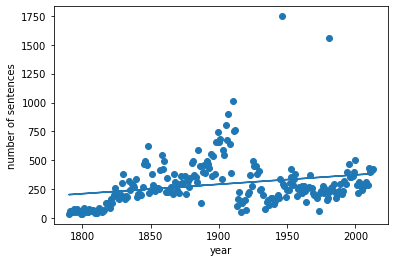

In [115]:
plt.scatter(year, sentences)
y_1, beta_1 = compute_linear_regression(year, sentences)
plt.plot(year, y_1)
plt.xlabel("year")
plt.ylabel("number of sentences")
plt.show()

In [116]:
#plot regression for mean sentence length and year 

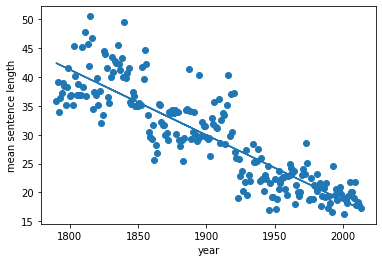

In [117]:
plt.scatter(year, mean_len)
y_2, beta_2 = compute_linear_regression(year, mean_len)
plt.plot(year, y_2)
plt.xlabel("year")
plt.ylabel("mean sentence length")
plt.show()

In [118]:
'''
implementing different parsing rules 
- remove prefix from list of sentences (Mr. Mrs. Ms.)
- remove blanks, numbers, and initials from list of sentences 
- consider ? ! as sentence parsers
'''

'\nimplementing different parsing rules \n- remove prefix from list of sentences (Mr. Mrs. Ms.)\n- remove blanks, numbers, and initials from list of sentences \n- consider ? ! as sentence parsers\n'

In [119]:
new_sou_lst = []
for s in sou_lst: 
    new_sentence = [sentence for sentence in s if sentence != " " and sentence != '']
    for sentence in new_sentence:
        if sentence in ["Mr", "Mrs", "Ms", " Mr", " Ms", " Mrs", "Dr", " Dr"]:
            new_sentence.remove(sentence)
        if len(sentence) == 1 and ord(sentence) >= 65 and ord(sentence) <= 90:
            new_sentence.remove(sentence)
        if sentence.lstrip("0").isdigit(): 
            new_sentence.remove(sentence)
    new_sou_lst.append(new_sentence)

In [120]:
'''
when we compare the number of very short sentences 
before and after the operation, we can see that the 
number of very short sentences has decreased drastically
'''

'\nwhen we compare the number of very short sentences \nbefore and after the operation, we can see that the \nnumber of very short sentences has decreased drastically\n'

In [121]:
ss = []
for s in sou_lst: 
    for sentence in s: 
        if len(sentence) <= 3: 
            ss.append(sentence)
len(ss)

1271

In [122]:
ss_new = [] 
for s in new_sou_lst: 
    for sentence in s: 
        if len(sentence) <= 3: 
            ss_new.append(sentence)
len(ss_new)

131

In [123]:
#plot linear regression for year and number of cleaned sentences 

In [ ]:
new_sentences = count_sentences(new_sou_lst)
new_mean_len = count_mean_length(new_sou_lst)

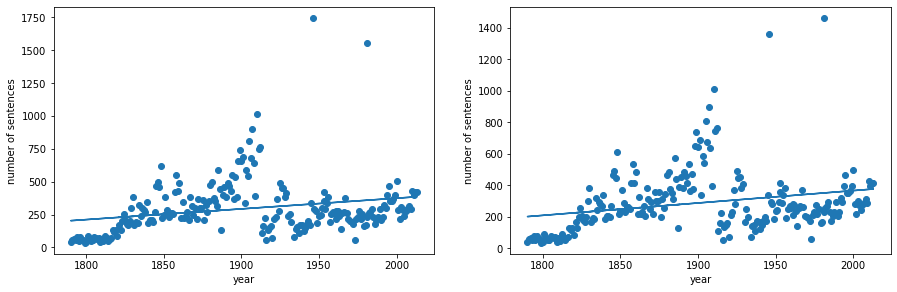

In [128]:
fig = plt.figure(figsize = (15, 10))
plt.subplot(221)
plt.scatter(year, sentences)
plt.plot(year, y_1)
plt.xlabel("year")
plt.ylabel("number of sentences")

plt.subplot(222)
plt.scatter(year, new_sentences)
y_1p, beta_1p = compute_linear_regression(year, new_sentences)
plt.plot(year, y_1p)
plt.xlabel("year")
plt.ylabel("number of sentences")
plt.show()

In [129]:
#plot linear regression for year and new mean sentence lengths 

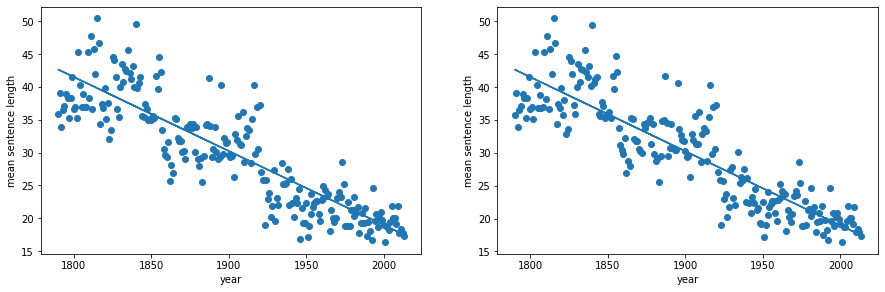

In [131]:
fig = plt.figure(figsize = (15, 10))
plt.subplot(221)
plt.scatter(year, mean_len)
plt.plot(year, y_2p)
plt.xlabel("year")
plt.ylabel("mean sentence length")

plt.subplot(222)
plt.scatter(year, new_mean_len)
y_2p, beta_2p = compute_linear_regression(year, new_mean_len)
plt.plot(year, y_2p)
plt.xlabel("year")
plt.ylabel("mean sentence length")
plt.show()

In [132]:
#describe trends and compare results 

'''
Even after we implemented different sentence parsing rules and segregated 
broken sentences, the overall trends did not change. As years passed, the 
number of sentences increased and the mean length of sentences decreased. 
'''

'\nEven after we implemented different sentence parsing rules and segregated \nbroken sentences, the overall trends did not change. As years passed, the \nnumber of sentences increased and the mean length of sentences decreased. \n'

In [133]:
# (c)

In [135]:
word_count_before = []
word_count_after = []
year_before = []
year_after = []
for i in range(len(year)):
    if year[i] >= 1790 and year[i] <= 1912:
        word_count = 0 
        for s in sou_lst[i]:
            word_count += len(s)
        word_count_before.append(word_count)
        year_before.append(year[i])
    else: 
        word_count = 0
        for s in sou_lst[i]:
            word_count += len(s)
        word_count_after.append(word_count)
        year_after.append(year[i])

In [138]:
# plot linear regression for year before 1912 and total number of words

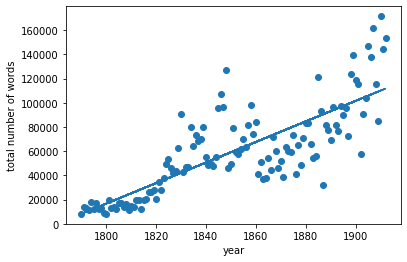

In [139]:
plt.scatter(year_before, word_count_before)
y_3, beta_3 = compute_linear_regression(year_before, word_count_before)
plt.xlabel("year")
plt.ylabel("total number of words")
plt.plot(year_before, y_3)
plt.show()

In [140]:
#plot linear regression for years after 1912 and total number of words

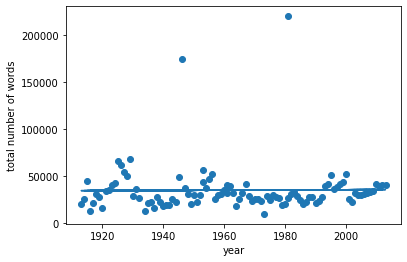

In [141]:
plt.scatter(year_after, word_count_after)
y_4, beta_4 = compute_linear_regression(year_after, word_count_after)
plt.xlabel("year")
plt.ylabel("total number of words")
plt.plot(year_after, y_4)
plt.show()

In [131]:
# describe the trends you see 

'''
The results show that before 1912, the total number of words in
a State of the Union speech had steadily increased over time. However, 
by 1912, there was an abrupt change in the trend. The total number 
of words dropped to pre-1840 levels and more or less stayed the same 
afterwards until the present. 

After some basic research, I was able to learn that the State of the 
Union speech originated from the practice of delivering an annual report
on the administrative matters of the executive branch during the past year. However, 
since President Wilson, the SOU became an effective podium for the head of 
state to further his political agenda and solicit support from the 
members of the legislature. The SOU was part of a campaign and policy 
driven performance, rather than a vocalized annal. 

As a result, SOU speeches became shorter and more dynamic, leading to impactful
sentences and shorter speeches. The plots above collectively illustrate these trends. 
'''

In [132]:
#(d)

In [142]:
presidents = [s["president"] for s in speeches]

In [143]:
presidents[:5]

['James Monroe',
 'William McKinley',
 'Dwight D. Eisenhower',
 'Calvin Coolidge',
 'James Madison']

In [146]:
sorted_mean_len = sorted(mean_len)
longest = sorted_mean_len[-1]
longest_p = presidents[mean_len.index(longest)]
print("longest: ", longest_p, longest)

shortest = sorted_mean_len[0]
shortest_p = presidents[mean_len.index(shortest)]
print("shortest: ", shortest_p, shortest)

median = mean_len[len(sorted_mean_len) // 2]
median_p = presidents[mean_len.index(median)]
print("median: ", median_p, median)

first_q = mean_len[len(sorted_mean_len) // 4]
first_q_p = presidents[mean_len.index(first_q)]
print("25%: ", first_q_p, first_q)

third_q = mean_len[math.floor(len(sorted_mean_len) * (3 / 4))]
third_q_p = presidents[mean_len.index(third_q)]
print("75%: ", third_q_p, third_q)


longest:  James Madison 50.492063492063494
shortest:  George W. Bush 16.301754385964912
median:  Theodore Roosevelt 35.60914454277286
25%:  James Monroe 37.48062015503876
75%:  Ronald Reagan 20.754789272030653


In [148]:
long = None
short = None 
long_len = 0 
short_len  = math.inf

In [156]:
for s in new_sou_lst: 
    for sentence in s: 
        words = sentence.split(" ")
        if len(words) < short_len: 
            short = sentence
            short_len = len(words)
        if len(words) > long_len:
            long = sentence 
            long_len = len(words)


print("longest text length: ", long_len)
print("shortest text length: ", short_len)

print("longest text: ", long)
print("shortest text: ", short)



longest text length:  610
shortest text length:  1
longest text:    

Over the past 48 months, clear progress has been made in solving the challenges we found in January of 1977:  

 almost all of our comprehensive energy program have been enacted, and the Department of Energy has been established to administer the program;  

 confidence in the government's integrity has been restored, and respect for the government's openness and fairness has been renewed;  

 the government has been made more effective and efficient: the Civil Service system was completely reformed for the first time this century; 14 reorganization initiatives have been proposed to the Congress, approved, and implemented; two new Cabinet departments have been created to consolidate and streamline the government's handling of energy and education problems; inspectors general have been placed in each Cabinet department to combat fraud, waste and other abuses; the regulatory process has been reformed through creatio

In [158]:
#Since Mr is not a word, let's take a look at 
#some one word sentences

In [157]:
for s in new_sou_lst:
    for sentence in s:
        w = sentence.split(" ")
        if len(w) == 1: 
            print(sentence)



Mr


Hon





Second


Third





Mr









m











2


3





Second
A
A











II


III


IV


Second


Third


Second


Fourth


Fifth


Second


Third


Fourth


Fifth


Mr



m



'


















)
-Dec








Second


Third


Fourth


Fifth






E






S






745M
128M

















A



"
















Second











2


3






--Riot
--Riot
--Riot
--Riots
--Outbreak
--Rebellion
--Revolt
--Revolution
--Revolution
--Riot
--Riot
--Revolution
--Riot
--Revolution
--Revolution
--Revolution











Second


Third












--


ART
5M



"







2


3


4


5
"

6


7
5%
MR
























m






A




















Second


Third






"

























Secondly


Thirdly


Fourthly









873,992,909


Mr


Second


Third
95M








Second
e
e
e








Mr


Second


Third





Second


Third


Fourth


ART


ART


2


3


4



R



5M
4M


First


Second


Third












"







In [ ]:
#The shortest sentence utter during the SOU could be "Second" or "Third", 
#provided that the number of syllables doesn't matter 